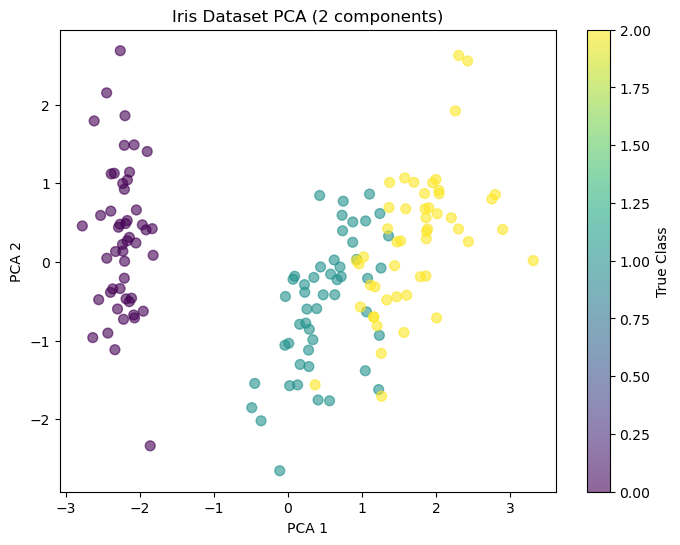

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist

iris = load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', marker='o', s=50, alpha=0.6)
plt.title('Iris Dataset PCA (2 components)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='True Class')
plt.show()

In [2]:
def kmeans_display(X, label):
    K = np.amax(label) + 1
    colors = ['b^', 'go', 'rs']
    for k in range(K):
        plt.plot(X[label == k, 0], X[label == k, 1], colors[k % len(colors)], markersize=4, alpha=.8)
    plt.axis('equal')
    plt.show()

def kmeans_init_centers(X, k):
    return X[np.random.choice(X.shape[0], k, replace=False)]

def kmeans_assign_labels(X, centers):
    D = cdist(X, centers)
    return np.argmin(D, axis=1)

def kmeans_update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1]))
    for k in range(K):
        Xk = X[labels == k, :]
        centers[k, :] = np.mean(Xk, axis=0)
    return centers

def has_converged(centers, new_centers):
    return (set([tuple(a) for a in centers]) == set([tuple(a) for a in new_centers]))

def kmeans(X, K):
    centers = [kmeans_init_centers(X, K)]
    labels = []
    it = 0
    while True:
        labels.append(kmeans_assign_labels(X, centers[-1]))
        new_centers = kmeans_update_centers(X, labels[-1], K)
        if has_converged(centers[-1], new_centers):
            break
        centers.append(new_centers)
        it += 1
    return (centers, labels, it)

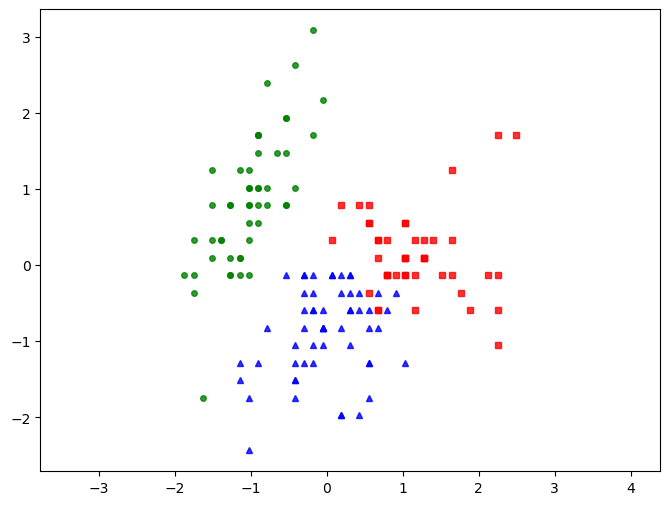

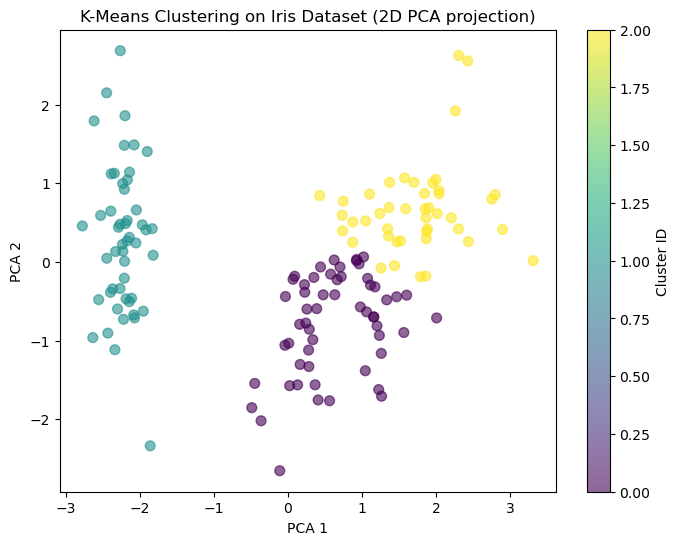

Centers found by our K-Means algorithm:
[[-0.01139555 -0.87600831  0.37707573  0.31115341]
 [-1.01457897  0.85326268 -1.30498732 -1.25489349]
 [ 1.16743407  0.14530299  1.00302557  1.0300019 ]]


In [3]:
K = 3
centers, labels, it = kmeans(X_scaled, K)

plt.figure(figsize=(8, 6))
kmeans_display(X_scaled, labels[-1])

X_pca_kmeans = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca_kmeans[:, 0], X_pca_kmeans[:, 1], c=labels[-1], cmap='viridis', marker='o', s=50, alpha=0.6)
plt.title('K-Means Clustering on Iris Dataset (2D PCA projection)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster ID')
plt.show()

print('Centers found by our K-Means algorithm:')
print(centers[-1])